### Initialization and Loading data

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("clean_data.csv").drop("Unnamed: 0", axis=1)

#### Useful fonctions

In [27]:
def get_training_sets(data, target_label, test_size=0.2):
    return train_test_split(
        data.drop(labels=target_label, axis=1),
        data[target_label],
        test_size=test_size
    )


def clf_score(clf, test_x, test_y):

    pred_y = clf.predict(test_x).astype(int)

    d = {
        "accuracy": metrics.accuracy_score,
        "precision": lambda true, pred: metrics.precision_score(true, pred, average='micro'),
        "recall": lambda true, pred: metrics.recall_score(true, pred, average='micro'),
        "jaccard": lambda true, pred: metrics.jaccard_score(true, pred, average='micro'),
    }

    return {
        name: method(test_y, pred_y)
        for name, method in d.items()
    }


def reg_score(clf, test_x, test_y):

    pred_y = clf.predict(test_x)

    d = {
        "explained variance": metrics.explained_variance_score,
        "RMSE": metrics.mean_squared_error,
        "R2": metrics.r2_score
    }

    return {
        name: method(test_y, pred_y)
        for name, method in d.items()
    }

### Decision Tree

#### Tree Classification

Scores:
  Accuracy: 0.62
  Precision: 0.62
  Recall: 0.62
  Jaccard: 0.45
Features importance:


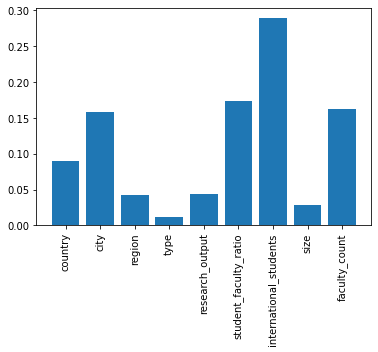

In [28]:


def show_tree_results(clf, test_x, test_y, with_graph=True):
    # Scores
    scores = clf_score(clf, test_x, test_y)
    print("Scores:")
    print("\n".join([
        f"  {name.capitalize()}: {score:0.2f}"
        for name, score in scores.items()
    ]))

    # Features importance
    print("Features importance:")
    plt.bar(clf.feature_names_in_, clf.feature_importances_)
    plt.xticks(rotation=90)
    plt.show()

    # Graph
    if with_graph:
        plt.figure(figsize=(20, 20))
        tree.plot_tree(clf, fontsize=6)
        plt.savefig('tree_results', dpi=100)
        

def decision_tree():
    not_feature_cols = [
        "university_with_year", "rank_display",
        "rank_display_raw", "score"
    ]

    tree_data = data.drop(labels=not_feature_cols, axis=1)
    train_x, test_x, train_y, test_y = get_training_sets(tree_data, "class")
    
    # Training
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf.fit(train_x, train_y)
    
    # Results
    show_tree_results(tree_clf, test_x, test_y, with_graph=False)
    
decision_tree()

### Regression

#### Linear Model

Scores:
Classification:
  Accuracy: 0.16
  Precision: 0.16
  Recall: 0.16
  Jaccard: 0.09
Regression:
  Explained variance: 0.50
  Rmse: 4.56
  R2: 0.50
Features importance:


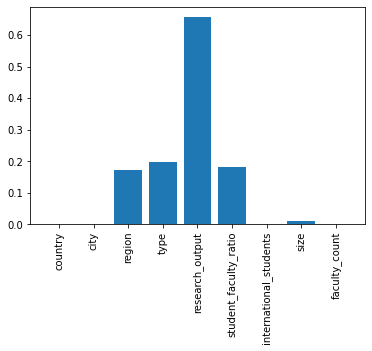

In [29]:
def show_lm_results(clf, test_x, test_y):
    # Scores
    reg_scores = reg_score(clf, test_x, test_y)
    clf_scores = clf_score(clf, test_x, test_y)

    print("Scores:")
    
    print("Classification:")
    print("\n".join([
        f"  {name.capitalize()}: {score:0.2f}"
        for name, score in clf_scores.items()
    ]))

    print("Regression:")
    print("\n".join([
        f"  {name.capitalize()}: {score:0.2f}"
        for name, score in reg_scores.items()
    ]))

    # Features importance
    print("Features importance:")
    plt.bar(clf.feature_names_in_, np.abs(clf.coef_))
    plt.xticks(rotation=90)
    plt.show()


scored_data = data.dropna()

def linear_model():
    not_feature_cols = [
        "university_with_year", "rank_display",
        "rank_display_raw", "score"
    ]

    lm_data = data.drop(labels=not_feature_cols, axis=1)
    train_x, test_x, train_y, test_y = get_training_sets(lm_data, "class")

    # Training
    lm_clf = LinearRegression()
    lm_clf.fit(train_x, train_y)

    # Results
    show_lm_results(lm_clf, test_x, test_y)

linear_model()

### XGBoost

#### Régression

Scores:
  Explained variance: 0.91
  Rmse: 33.91
  R2: 0.91
Features importance:


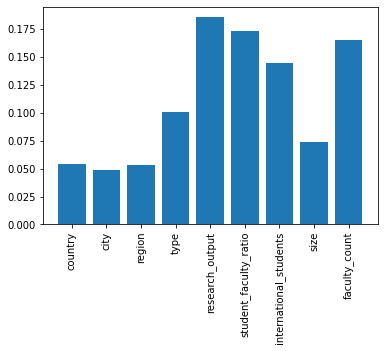

In [30]:
def show_score_xgreg_results(clf, test_x, test_y, features_names):
    # Scores
    reg_scores = reg_score(clf, test_x, test_y)

    print("Scores:")
    print("\n".join([
        f"  {name.capitalize()}: {score:0.2f}"
        for name, score in reg_scores.items()
    ]))

    # Features importance
    print("Features importance:")
    plt.bar(features_names, np.abs(clf.feature_importances_))
    plt.xticks(rotation=90)
    plt.show()
    
    
def score_xgregression():
    not_feature_cols = [
        "university_with_year", "rank_display",
        "rank_display_raw", "class"
    ]

    xgreg_data = data.drop(labels=not_feature_cols, axis=1)
    xgreg_data.dropna(inplace=True)

    train_x, test_x, train_y, test_y = get_training_sets(xgreg_data, "score")

    # Training
    xg_clf = XGBRegressor()
    xg_clf.fit(train_x, train_y)

    # Score
    show_score_xgreg_results(xg_clf, test_x, test_y, xgreg_data.drop(labels="score", axis=1).columns)

score_xgregression()
    
    

#### Classification

[18:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Scores:
  Accuracy: 0.60
  Precision: 0.60
  Recall: 0.60
  Jaccard: 0.43
Features importance:


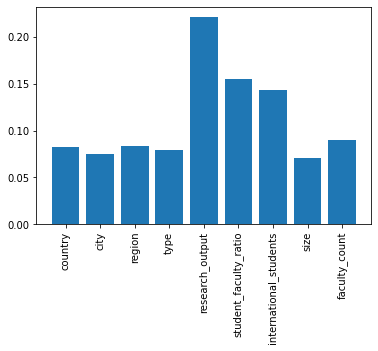

In [31]:
def show_rank_xgclf_results(clf, test_x, test_y, features_names):
    # Scores
    clf_scores = clf_score(clf, test_x, test_y)

    print("Scores:")
    print("\n".join([
        f"  {name.capitalize()}: {score:0.2f}"
        for name, score in clf_scores.items()
    ]))

    # Features importance
    print("Features importance:")
    plt.bar(features_names, np.abs(clf.feature_importances_))
    plt.xticks(rotation=90)
    plt.show()
    

def rank_xgclassification():
    not_feature_cols = [
        "university_with_year", "rank_display",
        "rank_display_raw", "score"
    ]

    xgreg_data = data.drop(labels=not_feature_cols, axis=1)
    xgreg_data.dropna(inplace=True)

    train_x, test_x, train_y, test_y = get_training_sets(xgreg_data, "class")

    # Training
    xg_clf = XGBClassifier()
    xg_clf.fit(train_x, train_y)

    # Score
    show_rank_xgclf_results(xg_clf, test_x, test_y, xgreg_data.drop(labels="class", axis=1).columns)

rank_xgclassification()
    
    